# Comparative Analysis of Chemical Composition in Red and White Wines: A Study on Volatile Acidity, Total Sulfur Dioxide, and Chlorides

<h5>Group 18: Vivaan Wadhwa, Katie Archer, Katelyn Thomas, Justin Lieu</h5>

## Introduction

The goal of the project is to explore the average level of Volatile Acidity, Total Sulfur Dioxide and Chlorides in Red and White wine. The dataset, [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality), is taken from [UCI Machine Learning Repository](https://archive.ics.uci.edu/datasets).

The dataset includes 13 attributes describing 

- ```Fixed Acidity```
- ```Volatile Acidity```
- ```Citric Acid```
- ```Residual Sugar```
- ```Chlorides```
- ```Free Sulfur Dioxide```
- ```Total Sulfur Dioxide```
- ```Density```
- ```pH```
- ```sulphates```
- ```alcohol```
- ```quality```

Research Question
<hr></hr>
How do the levels of <b>volatile acidity</b> differ between <b>red</b> and <b>white wines</b>, and are there statistically significant variations in these chemical components between the two wine types?

Therefore, our attribute of interest for this project is:

- ```Volatile Acidity```: Volatile acidity in the context of wine refers to the presence of volatile acids, primarily acetic acid.  It is a key factor in wine quality and can impact the wine's flavor and aroma.

To conduct research, we will be exploring the average levels (location parameter) of <b>volatile acidity</b> for each of the wines as well as standard deviation (scale parameter).

As previously explained, volatile acidity plays a pivotal role in the winemaking process and exhibits substantial variations across different wines. A study conducted by Babincev and Jović in 2021 delves into the chemical composition of white and red wines, revealing that white wine tends to have higher acidity levels compared to red wine. This finding underscores the importance and relevance of further investigation of volatile acidity.

## Preliminary Data Analysis

#### Loading Necessary Libraries

In [1]:
library(tidyverse)
library(infer)
library(repr)
library(dplyr)
library(readr)
options(repr.plot.width=5, repr.plot.height=5)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### Reading Data

In [2]:
# Reading in the data
url <- "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"

# Define the local file name for the downloaded ZIP file
zip_file <- "data/wine_quality.zip"

# Download the ZIP file from the URL
download.file(url, destfile = zip_file)

# Unzip the downloaded file
unzip(zip_file, exdir = "data")

In [3]:
# Read in the red and white wine data

wine_red_data <- read_delim("data/winequality-red.csv", delim = ";", show_col_types = FALSE) |>
                    mutate(type = "red")
wine_white_data <- read_delim("data/winequality-white.csv", delim = ";", show_col_types = FALSE)|>
                    mutate(type = "white")
#to check if we have missing values
sum(is.na(wine_white_data))
sum(is.na(wine_red_data)) 

[1] 0

[1] 0

Our dataset has no missing values so we do need to remove any rows. We add a column with the type of wine to the individual red and white wine dataset so that we can distinguish between the two when we combine them into a single dataset.

In [4]:
# Combining the red/white wine data and adding proper column names to the dataframe

wine_data <- rbind(wine_red_data, wine_white_data)
colnames(wine_data) <- c("fixed.acidity","volatile.acidity","citric.acid","residual.sugar",
                         "chlorides","free.sulfur.dioxide","total.sulfur.dioxide","density",
                         "pH","sulphates","alcohol","quality","type")
head(wine_data)


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


Now that we have combined the two datasets together, we will drop all the unnecessary columns to get our final dataset that we will work with.

In [5]:
# Selecting the specific features we're analyzing
wine_data_specific <- wine_data |>
                        select(volatile.acidity, type)
head(wine_data_specific)
cat("There are", nrow(wine_data_specific),"rows in the dataset")

volatile.acidity,type
<dbl>,<chr>
0.70,red
0.88,red
0.76,red
0.28,red
0.70,red
0.66,red


There are 6497 rows in the dataset

#### Selecting Sample

Now, we will be taking a sample from our population. Since our population size is <b>6497</b>, we will be taking a sample of <b>650</b> from our population.

In [6]:
set.seed(2204) #DO NOT REMOVE

wine_sample <- wine_data_specific |>
                sample_n(size = 650)
                    

head(wine_sample)

volatile.acidity,type
<dbl>,<chr>
0.13,white
0.29,white
0.47,red
0.26,white
0.47,red
0.21,red


#### Histograms of the Volatile Acidity against respective Wine Types

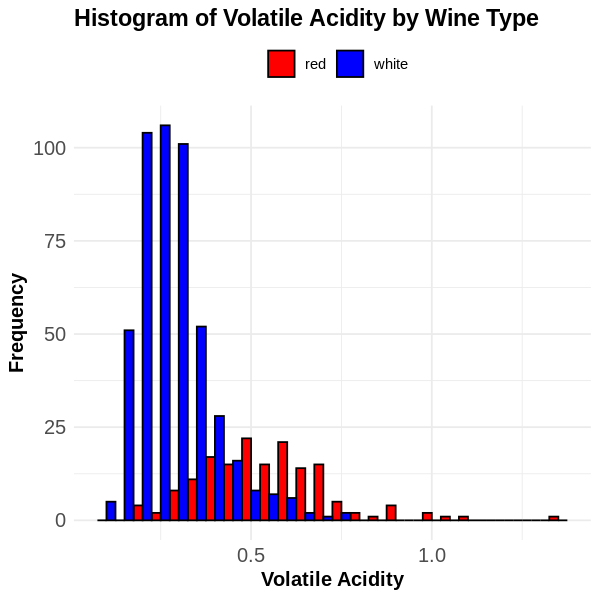

In [7]:
# Histogram of volatile acidity against the respective wine type

ggplot(wine_sample, aes(x = volatile.acidity, fill = type)) +
  geom_histogram(binwidth = 0.05, position = "dodge", color = "black") +
  labs(title = paste("Histogram of Volatile Acidity by Wine Type"), x = "Volatile Acidity", y = "Frequency") +
  scale_fill_manual(values = c("red" = "red", "white" = "blue")) +
  theme_minimal() +
  theme(legend.title = element_blank(),
        legend.position = "top",  # Change the legend position
        plot.title = element_text(size = 14, face = "bold"),  # Title style
        axis.text = element_text(size = 12),  # Axis label text size
        axis.title = element_text(size = 12, face = "bold"))

The histogram presented above clearly illustrates a distinct contrast in the concentrations of Volatile Acid between Red and White wines in our sample. Each type of wine exhibits a unique distribution pattern within these histograms, emphasizing the disparities observed in these chemical components.

#### Side by Side Boxplots of each variable associated with the Wine Type

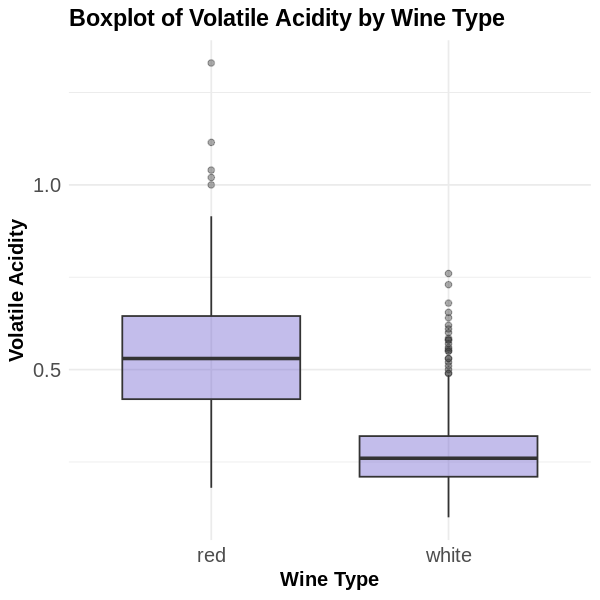

In [14]:
ggplot(wine_sample, aes(x = type, y = feature)) +
      geom_boxplot(fill = "slateblue", alpha = 0.4) +
      labs(title = paste("Boxplot of Volatile Acidity by Wine Type", sep = " "), x = "Wine Type", y = "Volatile Acidity") +
      theme_minimal() +
      theme(legend.title = element_blank(),
            legend.position = "top",  # Change the legend position
            plot.title = element_text(size = 14, face = "bold"),  # Title style
            axis.text = element_text(size = 12),  # Axis label text size
            axis.title = element_text(size = 12, face = "bold"))


The differences are more recognizable by the boxplots seen above.

#### Observed Parameters of Red Wine

In [15]:
wine_red <- wine_sample |>
                filter(type == "red") 
red_sd_volatile <- sd(wine_red$volatile.acidity)
summary(wine_red)

 volatile.acidity     type          
 Min.   :0.1800   Length:161        
 1st Qu.:0.4200   Class :character  
 Median :0.5300   Mode  :character  
 Mean   :0.5445                     
 3rd Qu.:0.6450                     
 Max.   :1.3300                     

In [16]:
cat("Standard Deviation of Volatile Acidity in Red Wine:", red_sd_volatile, "\n")

Standard Deviation of Volatile Acidity in Red Wine: 0.1811846 


#### Observed Parameters of White Wine

In [17]:
wine_white <- wine_sample |>
                filter(type == "white")
white_sd_volatile <- sd(wine_white$volatile.acidity)
summary(wine_white)

 volatile.acidity     type          
 Min.   :0.1000   Length:489        
 1st Qu.:0.2100   Class :character  
 Median :0.2600   Mode  :character  
 Mean   :0.2805                     
 3rd Qu.:0.3200                     
 Max.   :0.7600                     

In [20]:
cat("Standard Deviation of Volatile Acidity in White Wine:", white_sd_volatile, "\n")

Standard Deviation of Volatile Acidity in White Wine: 0.1033947 


In [22]:
red_wine_summary <- wine_red %>%
  summarise(
    Wine_Type = "Red",      
    Mean_Volatile_Acidity = mean(volatile.acidity),
    SD_Volatile_Acidity = sd(volatile.acidity)
  )

# Calculate the mean and SD for white wine data
white_wine_summary <- wine_white %>%
  summarise(
    Wine_Type = "White",      
    Mean_Volatile_Acidity = mean(volatile.acidity),
    SD_Volatile_Acidity = sd(volatile.acidity)
  )

#Calculating the difference
diff_summary <- data.frame(
    Wine_Type = "Difference",      
    Mean_Volatile_Acidity = mean(wine_red$volatile.acidity) - mean(wine_white$volatile.acidity),
    SD_Volatile_Acidity = sd(wine_red$volatile.acidity) - sd(wine_white$volatile.acidity)
)

# Combine the summaries into a single table
summary_table <- bind_rows(red_wine_summary,white_wine_summary,diff_summary)

summary_table

Wine_Type,Mean_Volatile_Acidity,SD_Volatile_Acidity
<chr>,<dbl>,<dbl>
Red,0.5445031,0.18118465
White,0.2804703,0.10339465
Difference,0.2640328,0.07778999


From our visualisations and observed statistics, we can see that there are some differences that can be distinguished between the mean and standard deviation of volatile acidity of Red and White Wine.

## Methods

This report is trustworthy in many ways. First off, our sample is random and unbiased as we use the sample_n method. Our sample is also reproducible as we have set our seed. Further, there is a significant different between red and white wine as seen by the visualisations and summary tables presented above. But, these observed statistics and visualisations alone are not enough for us to reach a conclusive statement. The results shown above can easily be attributed to sampling variability and thus cannot imply that there is a difference in the population parameters.

To determine whether the observed differences in chemical components between red and white wines are statistically significant, hypothesis test will be conducted. Further, we will also be computing 95% confidence intervals for each of these attributes

For volatile acidity, we will conduct our hypothesis test via bootstrapping. Setting $H_{0}: \mu_{\text{Volatile Acidity of Red Wine}} - \mu_{\text{Volatile Acidity of White Wine}} = 0$ , and our alternative hypothesis to $H_{a}: \mu_{\text{Volatile Acidity of Red Wine}} - \mu_{\text{Volatile Acidity of White Wine}} \neq 0$, we will plot the bootstrap distribution of the null hypothesis using the infer package. From there, we will calculate the two-tailed p-value, given our observed statistic from our original sample (0.264). To determine if the difference in means between red and white wines is significant, we will compare the p-value to a 5% significance level.

Add more?


Our initial null and alternate hypothesis for the location parameter i.e. the average level of the chemical attributes is:

$$H_{0}:
\begin{align*}
    &\mu_{\text{Volatile Acidity of Red Wine}} - \mu_{\text{Volatile Acidity of White Wine}} = 0 \\
\end{align*}
$$


$$H_{a}:
\begin{align*}
    &\mu_{\text{Volatile Acidity of Red Wine}} - \mu_{\text{Volatile Acidity of White Wine}} \neq 0 \\
\end{align*}
$$


## Expected Results

Based on our initial analysis, visualizations, and statistical results, it appears highly probable that our calculated p-value is less than 0.05 $(p < 0.05)$. In this context, rejecting the null hypothesis, which assumes no difference in the means and standard deviations of the chemical attributes between red and white wine, is likely.

Moreover, considering the size of our sample, which is quite substantial, we anticipate that the confidence interval derived from our data will be relatively wide. This wide interval provides a high degree of confidence that it encompasses the true population parameter, given the inherent variability in our estimates

## Future Questions

Further question that could be researched upon after this report could be:

- Are there specific attributes that are more influential in determining wine quality?
- How do the chemical attributes of wines change over time with aging and maturation? Do red and white wines exhibit distinct patterns in how their attributes evolve?
- Can the chemical attributes of wines be used for authentication and detection of counterfeit or fraudulent wines?

## References

- Babincev, L.M., Jović, S. Determination of the amount of volatile acids in oxidized wines and neutralization of these by using chemical reagents and biological materials. Biomass Conv. Bioref. 13, 4717–4725 (2023). https://doi.org/10.1007/s13399-021-01339-7
- Kelly M. Volatile Acidity in Wine PennState Extension https://extension.psu.edu/volatile-acidity-in-wine